In [48]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt

In [49]:
df_BTC = pd.read_csv('BTC-all-data.csv')

In [50]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp
0,"05/24/2023, 23:00:00","05/24/2023, 23:59:59",26348.52,26394.16,26318.25,26329.01,712.51394,18778933.16,16479,376.83127,9.932271e+06,0,1.684970e+12,1.684970e+12
1,"05/24/2023, 22:00:00","05/24/2023, 22:59:59",26368.66,26406.00,26313.47,26348.52,746.24121,19670396.24,19907,325.98884,8.592227e+06,0,1.684970e+12,1.684970e+12
2,"05/24/2023, 21:00:00","05/24/2023, 21:59:59",26404.18,26464.65,26310.48,26368.66,1223.45586,32298325.57,27225,642.68037,1.696504e+07,0,1.684960e+12,1.684970e+12
3,"05/24/2023, 20:00:00","05/24/2023, 20:59:59",26252.34,26486.46,26242.62,26404.18,2878.77545,75937036.88,47336,1539.53932,4.060586e+07,0,1.684960e+12,1.684960e+12
4,"05/24/2023, 19:00:00","05/24/2023, 19:59:59",26220.55,26397.64,26201.67,26252.33,2349.96235,61795762.11,40509,1171.28517,3.080221e+07,0,1.684950e+12,1.684960e+12


In [51]:
df_BTC['datetime'] = df_BTC['open_time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y, %H:%M:%S"))

In [52]:
df_BTC['year'] = df_BTC['datetime'].apply(lambda x: x.year)
df_BTC['month'] = df_BTC['datetime'].apply(lambda x: x.month)
df_BTC['day'] = df_BTC['datetime'].apply(lambda x: x.day)
df_BTC['day_of_week'] = df_BTC['datetime'].apply(lambda x: x.weekday())

In [53]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,datetime,year,month,day,day_of_week
0,"05/24/2023, 23:00:00","05/24/2023, 23:59:59",26348.52,26394.16,26318.25,26329.01,712.51394,18778933.16,16479,376.83127,9.932271e+06,0,1.684970e+12,1.684970e+12,2023-05-24 23:00:00,2023,5,24,2
1,"05/24/2023, 22:00:00","05/24/2023, 22:59:59",26368.66,26406.00,26313.47,26348.52,746.24121,19670396.24,19907,325.98884,8.592227e+06,0,1.684970e+12,1.684970e+12,2023-05-24 22:00:00,2023,5,24,2
2,"05/24/2023, 21:00:00","05/24/2023, 21:59:59",26404.18,26464.65,26310.48,26368.66,1223.45586,32298325.57,27225,642.68037,1.696504e+07,0,1.684960e+12,1.684970e+12,2023-05-24 21:00:00,2023,5,24,2
3,"05/24/2023, 20:00:00","05/24/2023, 20:59:59",26252.34,26486.46,26242.62,26404.18,2878.77545,75937036.88,47336,1539.53932,4.060586e+07,0,1.684960e+12,1.684960e+12,2023-05-24 20:00:00,2023,5,24,2
4,"05/24/2023, 19:00:00","05/24/2023, 19:59:59",26220.55,26397.64,26201.67,26252.33,2349.96235,61795762.11,40509,1171.28517,3.080221e+07,0,1.684950e+12,1.684960e+12,2023-05-24 19:00:00,2023,5,24,2


In [54]:
df_BTC = df_BTC.sort_values('datetime', ascending = True)

In [55]:
df_BTC['change_open'] = - (df_BTC['open'].shift(1) - df_BTC['open'])

In [56]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,datetime,year,month,day,day_of_week,change_open
20961,"01/01/2021, 00:00:00","01/01/2021, 00:59:59",28923.63,29031.34,28690.17,28995.13,2311.811445,6.676883e+07,58389,1215.359238,35103542.78,0,1.609460e+12,1.609460e+12,2021-01-01 00:00:00,2021,1,1,4,NaN
20960,"01/01/2021, 01:00:00","01/01/2021, 01:59:59",28995.13,29470.00,28960.35,29409.99,5403.068471,1.583578e+08,103896,3160.041701,92613991.94,0,1.609460e+12,1.609470e+12,2021-01-01 01:00:00,2021,1,1,4,71.50
20959,"01/01/2021, 02:00:00","01/01/2021, 02:59:59",29410.00,29465.26,29120.03,29194.65,2384.231560,6.984265e+07,57646,1203.433506,35252749.91,0,1.609470e+12,1.609470e+12,2021-01-01 02:00:00,2021,1,1,4,414.87
20958,"01/01/2021, 03:00:00","01/01/2021, 03:59:59",29195.25,29367.00,29150.02,29278.40,1461.345077,4.276078e+07,42510,775.915666,22705547.98,0,1.609470e+12,1.609470e+12,2021-01-01 03:00:00,2021,1,1,4,-214.75
20957,"01/01/2021, 04:00:00","01/01/2021, 04:59:59",29278.41,29395.00,29029.40,29220.31,2038.046803,5.961464e+07,55414,1003.342834,29346381.88,0,1.609470e+12,1.609480e+12,2021-01-01 04:00:00,2021,1,1,4,83.16


In [57]:
corr_matrix = df_BTC.corr()

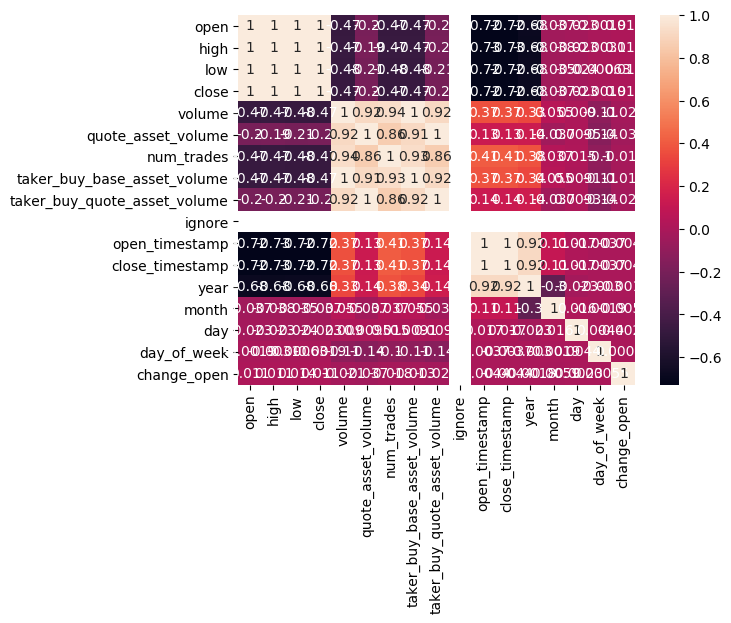

In [58]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

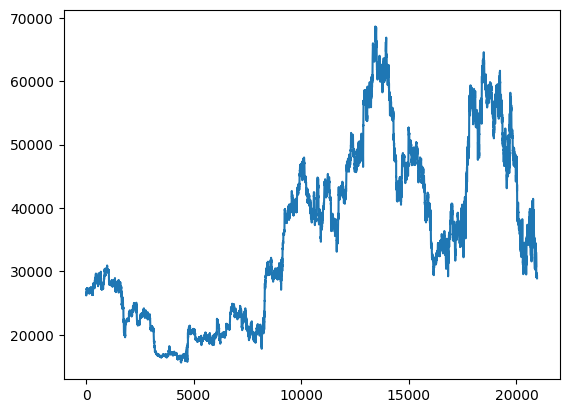

In [60]:
df_BTC['open'].plot()
plt.show()

In [61]:
#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

<class 'pandas.core.frame.DataFrame'>
                         open
datetime                     
2021-01-01 00:00:00  28923.63
2021-01-01 01:00:00  28995.13
2021-01-01 02:00:00  29410.00
2021-01-01 03:00:00  29195.25
2021-01-01 04:00:00  29278.41


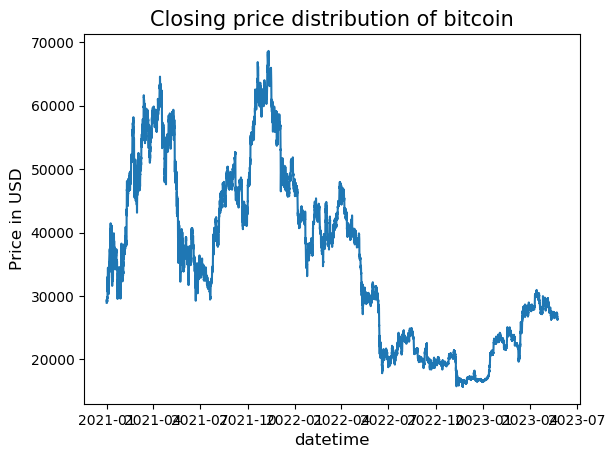

In [65]:
data = df_BTC['open']
Date1 = df_BTC['datetime']
train1 = df_BTC[['datetime','open']]
# Setting the Date as Index
train2 = train1.set_index('datetime')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())
plt.plot(train2)
plt.xlabel('datetime', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

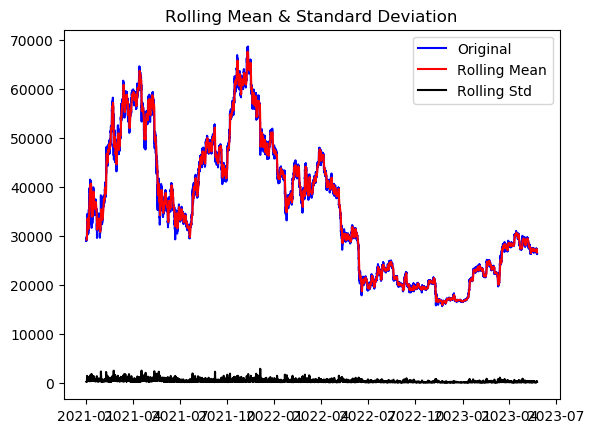

ADF Stastistic: -1.443208
p-value: 0.561396
The graph is non stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [67]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train2['open']      
test_stationarity(ts)

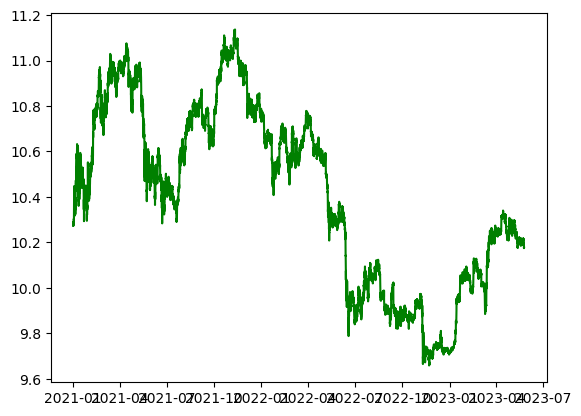

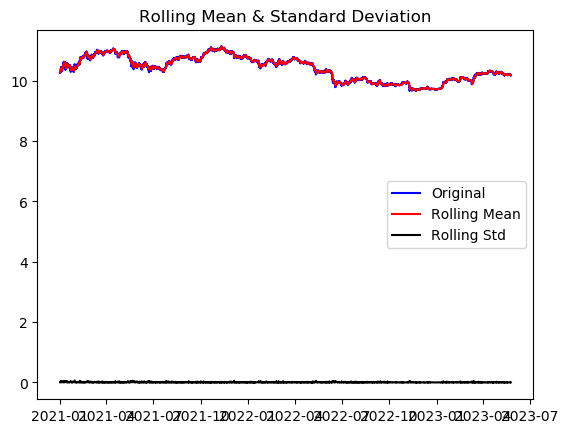

ADF Stastistic: -1.270820
p-value: 0.642414
The graph is non stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [68]:
ts_log = np.log(ts)
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

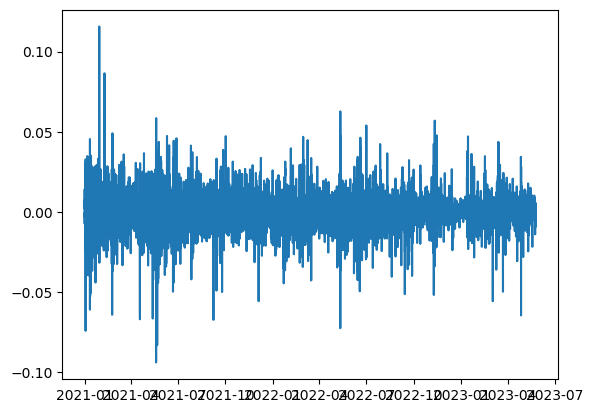

In [69]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

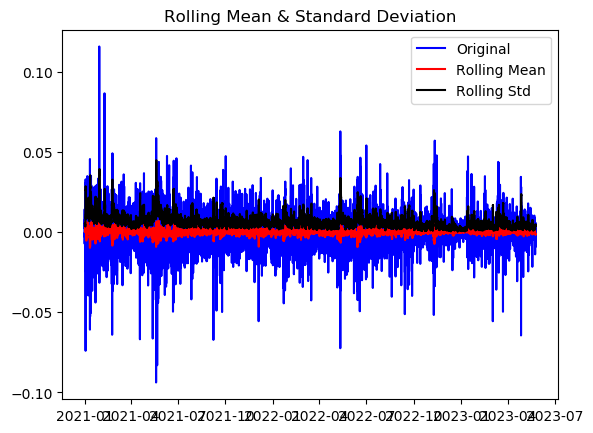

ADF Stastistic: -30.404747
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [70]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


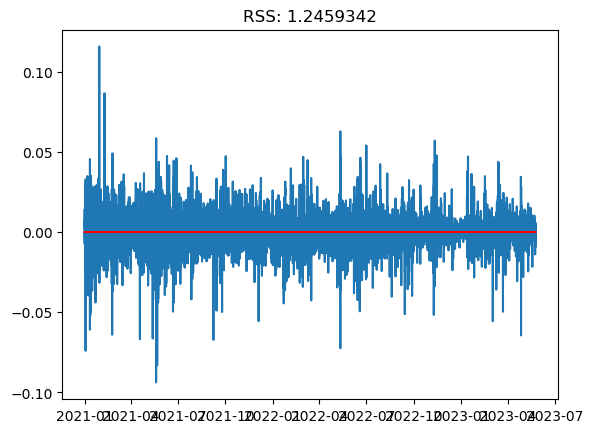

In [72]:
from statsmodels.tsa.arima_model import ARIMA
# follow lag
model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


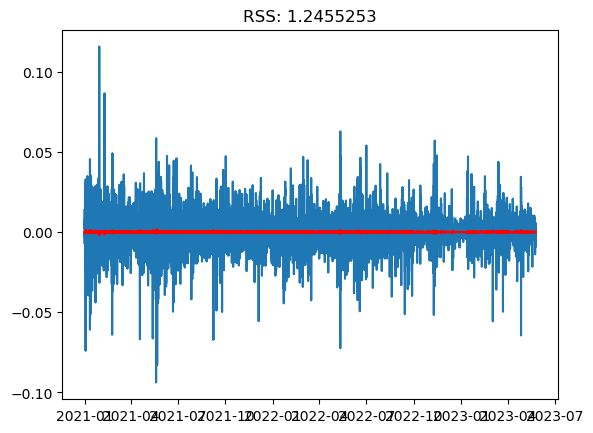

In [74]:
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

In [78]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

SyntaxError: invalid syntax (<ipython-input-78-5caf3221045a>, line 26)